In [1]:
import sys
import os
sys.path.append(os.path.abspath("../newgameplus"))


import pandas as pd
import numpy as np
from recommender import load_data
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sentence_transformers import SentenceTransformer
import re

In [2]:
# Load cleaned data
df = load_data()
df = df.dropna(subset=['about_the_game'])

[INFO] CSV already exists at C:\Users\asads\documents\CS506_FinalProject\new-game-plus-backend\newgameplus\data\games.csv


In [3]:
# Clean text by removing numbers, punctuation, and lowercasing
def clean_text(text):
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = text.lower()
    return text

descriptions = df['about_the_game'].fillna('').apply(clean_text)
df['desc_length'] = descriptions.apply(len)


In [4]:
# Sentence embedding using a transformer model
model = SentenceTransformer("all-MiniLM-L6-v2")
X_embed = model.encode(descriptions.tolist(), show_progress_bar=True)

Batches:   0%|          | 0/2797 [00:00<?, ?it/s]

In [5]:
# Append normalized description length as a feature
scaler = StandardScaler()
desc_length_scaled = scaler.fit_transform(df[['desc_length']])
X_combined = np.hstack((X_embed, desc_length_scaled))

In [6]:
# KMeans clustering
kmeans_text = KMeans(n_clusters=8, random_state=42, n_init=100)
text_clusters = kmeans_text.fit_predict(X_combined)
df['text_cluster'] = text_clusters

In [7]:
# Print example games from each cluster
print("\nExample games from each cluster:")
for i in range(8):
    print(f"\nCluster {i} sample games:")
    sample_games = df[df['text_cluster'] == i]['name'].dropna().drop_duplicates().head(5)
    for name in sample_games:
        print(f"  {name}")


Example games from each cluster:

Cluster 0 sample games:
  PUBG: BATTLEGROUNDS
  Geometry Dash
  Don't Starve Together
  NARAKA: BLADEPOINT
  The Elder Scrolls V: Skyrim Special Edition

Cluster 1 sample games:
  Grand Theft Auto V Legacy
  Stardew Valley
  Dead by Daylight
  Unturned
  PAYDAY 2

Cluster 2 sample games:
  ARK: Survival Evolved
  Anime Girls - gacha game
  Rivals of Aether
  Amazing Cultivation Simulator
  Reign Of Kings

Cluster 3 sample games:
  Rust
  Black Myth: Wukong
  The Witcher 3: Wild Hunt
  ELDEN RING
  Euro Truck Simulator 2

Cluster 4 sample games:
  Aircraft Carrier Survival: Tutorial
  Vampire Memories - 吸血鬼的回忆

Cluster 5 sample games:
  Dota 2
  Tom Clancy's Rainbow Six® Siege
  Garry's Mod
  Cyberpunk 2077
  HELLDIVERS™ 2

Cluster 6 sample games:
  Baldur's Gate 3
  鬼谷八荒 Tale of Immortal
  RimWorld
  Assetto Corsa
  Frostpunk

Cluster 7 sample games:
  Counter-Strike 2
  Team Fortress 2
  Terraria
  Apex Legends™
  The Forest


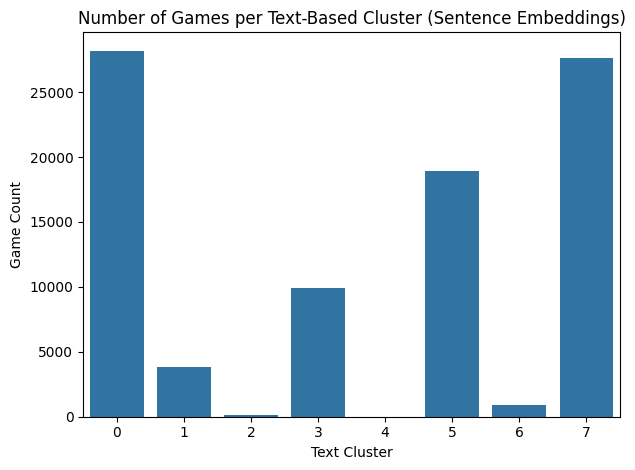

In [8]:
# Visualize cluster distribution
sns.countplot(x='text_cluster', data=df)
plt.title("Number of Games per Text-Based Cluster (Sentence Embeddings)")
plt.xlabel("Text Cluster")
plt.ylabel("Game Count")
plt.tight_layout()
plt.show()

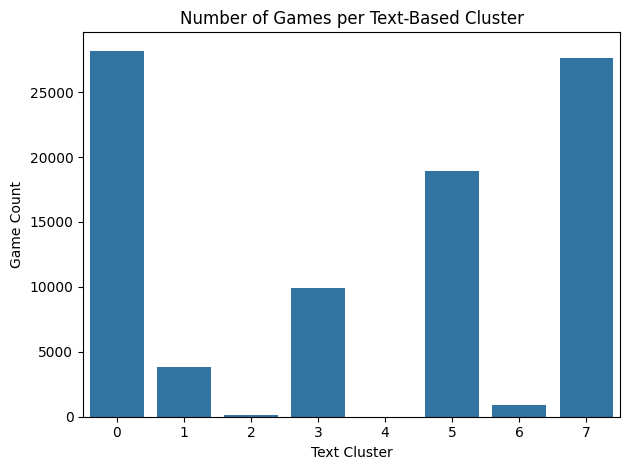

In [9]:
# Visualize cluster distribution
sns.countplot(x='text_cluster', data=df)
plt.title("Number of Games per Text-Based Cluster")
plt.xlabel("Text Cluster")
plt.ylabel("Game Count")
plt.tight_layout()
plt.show()
